In [1]:
from pathlib import Path
from shapely import Point

import geopandas as gpd
import pandas as pd

from sample_mapillary_detections import geo_halton_2d


In [2]:
PROJ_ROOT = Path.cwd().parent
PROJ_ROOT


PosixPath('/Users/jay/repos/sample-mapillary-detections')

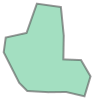

In [3]:
gdf = gpd.read_file(PROJ_ROOT / "data/BeverlyHills.geojson")

target_geo = gdf.geometry[0]
target_geo


In [4]:
type(target_geo)


shapely.geometry.polygon.Polygon

In [5]:
# (minx, miny, maxx, maxy)
target_geo.bounds


(-118.42903750466354,
 34.05131609074118,
 -118.36990231365832,
 34.11439205916763)

In [6]:
sampler = geo_halton_2d(target_geo)


In [7]:
next(sampler)


(-118.39946990916093, 34.07234141355)

<Axes: >

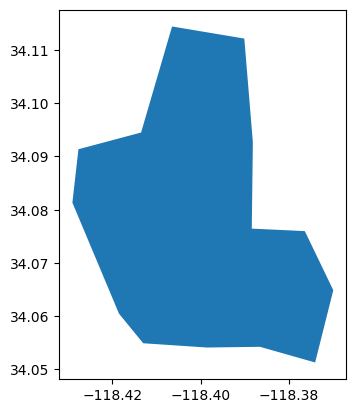

In [8]:
gdf.plot()


<Axes: >

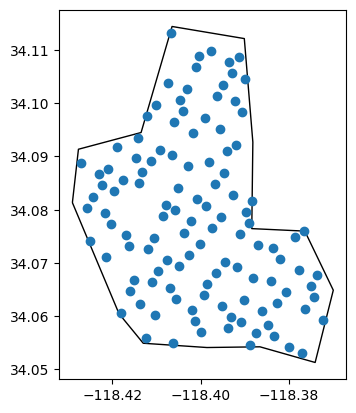

In [9]:
gdf2 = gpd.GeoDataFrame(geometry=[Point(next(sampler)) for _ in range(117)], crs=gdf.crs)

gpd.GeoDataFrame(pd.concat([gdf, gdf2], ignore_index=True)).plot(facecolor="none")
